<a href="https://colab.research.google.com/github/Caiopsc/lia1_2025_1/blob/main/Entregas%20-%20Caio%20Pantale%C3%A3o/atividade_aula_dia_09_de_abril_Caio_Pantaleao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


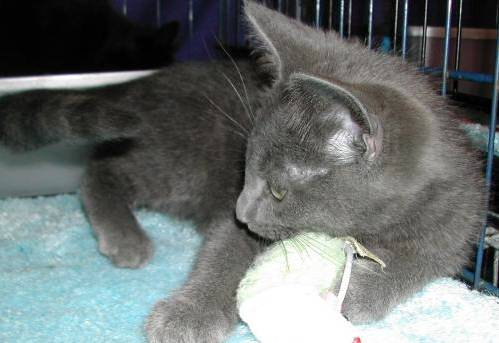

In [4]:
# Exibir imagens
Image(filename='/content/drive/MyDrive/colab_notebook_aula09/dataset_treino/dogs/dog.99.jpg')
Image(filename='/content/drive/MyDrive/colab_notebook_aula09/dataset_treino/cats/cat.100.jpg')
Image(filename='/content/drive/MyDrive/colab_notebook_aula09/dataset_teste/100.jpg')

In [5]:
# Definindo o modelo
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(64, (3, 3), activation='relu'))  # Aumentado o número de filtros
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Preparação dos dados
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/colab_notebook_aula09/dataset_treino',
                                                 target_size=(256, 256),
                                                 batch_size=64,
                                                 class_mode='binary',
                                                 subset='training')
validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/colab_notebook_aula09/dataset_treino',
                                                   target_size=(256, 256),
                                                   batch_size=64,
                                                   class_mode='binary',
                                                   subset='validation')


Found 810 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [7]:
# Ajuste do EarlyStopping
early_stopping = EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)


In [ ]:
# Treinamento do modelo
classifier.fit(training_set, steps_per_epoch=625, validation_data=validation_set,
                validation_steps=125, callbacks=[early_stopping], epochs=15)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 13/625 ━━━━━━━━━━━━━━━━━━━━ 1:45:18 10s/step - accuracy: 0.4971 - loss: 3.4756

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


625/625 ━━━━━━━━━━━━━━━━━━━━ 181s 256ms/step - accuracy: 0.5060 - loss: 2.1071 - val_accuracy: 0.5050 - val_loss: 0.6923
Epoch 2/15
  5/625 ━━━━━━━━━━━━━━━━━━━━ 1:27:43 8s/step - accuracy: 0.5511 - loss: 0.6792

In [ ]:
# Avaliação do modelo
y_true = validation_set.classes
y_pred_prob = classifier.predict(validation_set)
y_pred = (y_pred_prob > 0.5).astype("int32")

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Gato', 'Cachorro'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Relatório de Classificação
print(classification_report(y_true, y_pred, target_names=['Gato', 'Cachorro']))


In [ ]:
# Teste de uma imagem
test_image = image.load_img('/content/drive/MyDrive/colab_notebook_aula09/dataset_teste/99.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar a imagem
result = classifier.predict(test_image)
class_indices = training_set.class_indices
if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)

print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")
Image(filename='/content/drive/MyDrive/colab_notebook_aula09/dataset_teste/99.jpg')